In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("default")
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv('shld.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### Data Preprocessing Part 1

In [4]:
#Check the number of unique value from all of the datatype
df.select_dtypes(include='object').nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     3
dtype: int64

In [5]:
#Drop identifier column like 'Person ID'
df.drop(columns='Person ID', inplace= True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### Split blood presure into two columns 

In [6]:
#split blood presure into two separate columns
df[['Blood Pressure 1', 'Blood Pressure 2']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [7]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [8]:
#Drop identifier column like 'Blood Presure'
df.drop(columns='Blood Pressure', inplace= True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [9]:
#Check BMI category unique value
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [10]:
#Check Occupation unique value
df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [11]:
#Check Sleep Disorder unique value
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

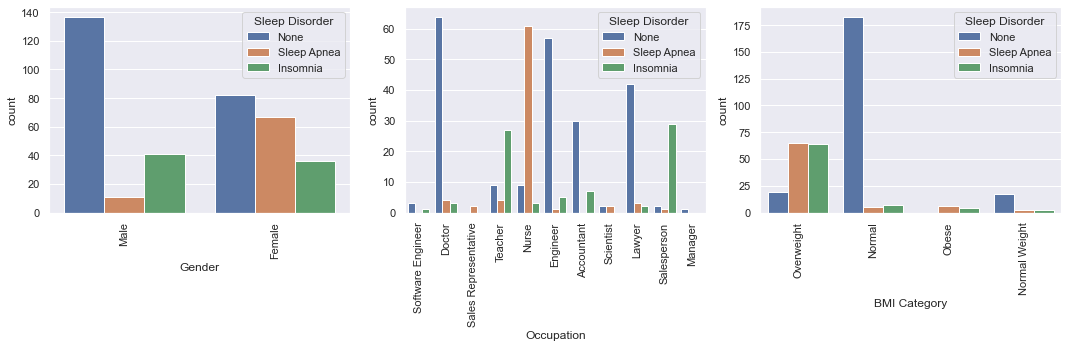

In [12]:
#list of categorical variable of a plot
cat_vars = ["Gender", "Occupation", "BMI Category"]

#Create figure with subplots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
axs = axs.flatten()

#
for i, var in enumerate(cat_vars):
    sns.countplot(x = var, hue='Sleep Disorder', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    
fig.tight_layout()

plt.show()
    
    

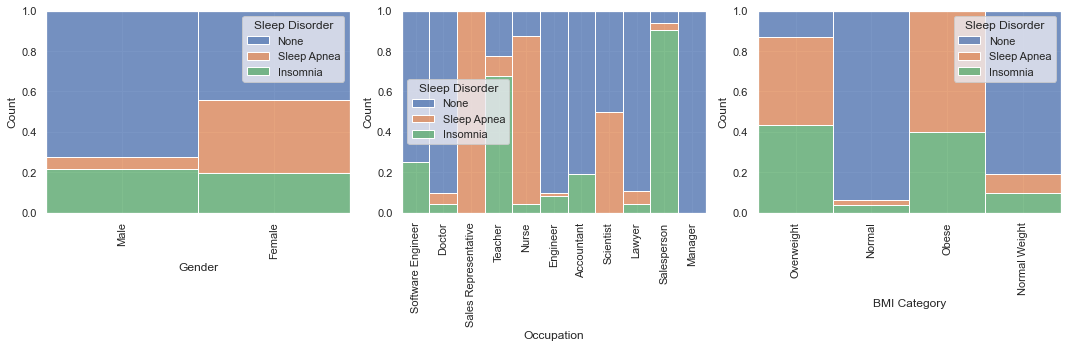

In [13]:
warnings.filterwarnings("ignore")

cat_vars = ["Gender", "Occupation", "BMI Category"]

#Create figure with subplots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
axs = axs.flatten()

#
for i, var in enumerate(cat_vars):
    sns.histplot(x = var, hue='Sleep Disorder', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True)
    axs[i].set_xticklabels(df[var].unique(), rotation = 90)
    axs[i].set_xlabel(var)
    
fig.tight_layout()

plt.show()

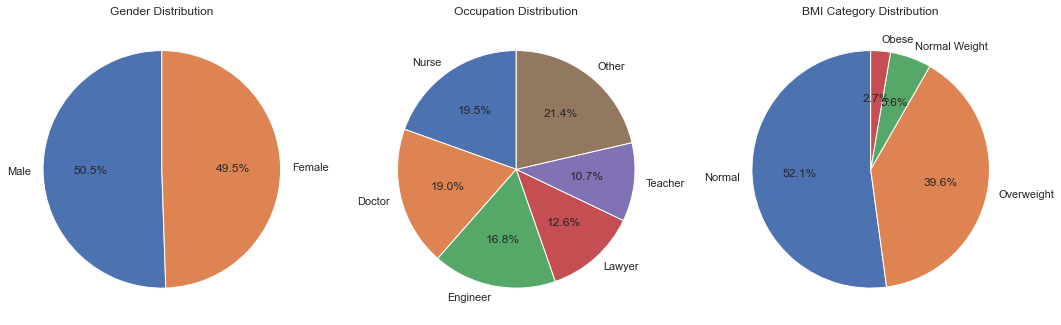

In [14]:
max_categories = 5

cat_vars = ["Gender", "Occupation", "BMI Category"]

# Create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=len(cat_vars), figsize=(15, 5))

for i, var in enumerate(cat_vars):
    cat_counts = df[var].value_counts()
    if len(cat_counts) > max_categories:
        cat_counts = cat_counts[:max_categories]
        cat_counts.loc['Other'] = df[var].value_counts().sum() - cat_counts.sum()

    axs[i].pie(cat_counts, labels=cat_counts.index, autopct="%1.1f%%", startangle=90)
    axs[i].set_title(f"{var} Distribution")

fig.tight_layout()

plt.show()


In [15]:
num_vars = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", 
           "Daily Steps", "Blood Pressure 1", "Blood Pressure 2"]
print(num_vars)

['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood Pressure 1', 'Blood Pressure 2']


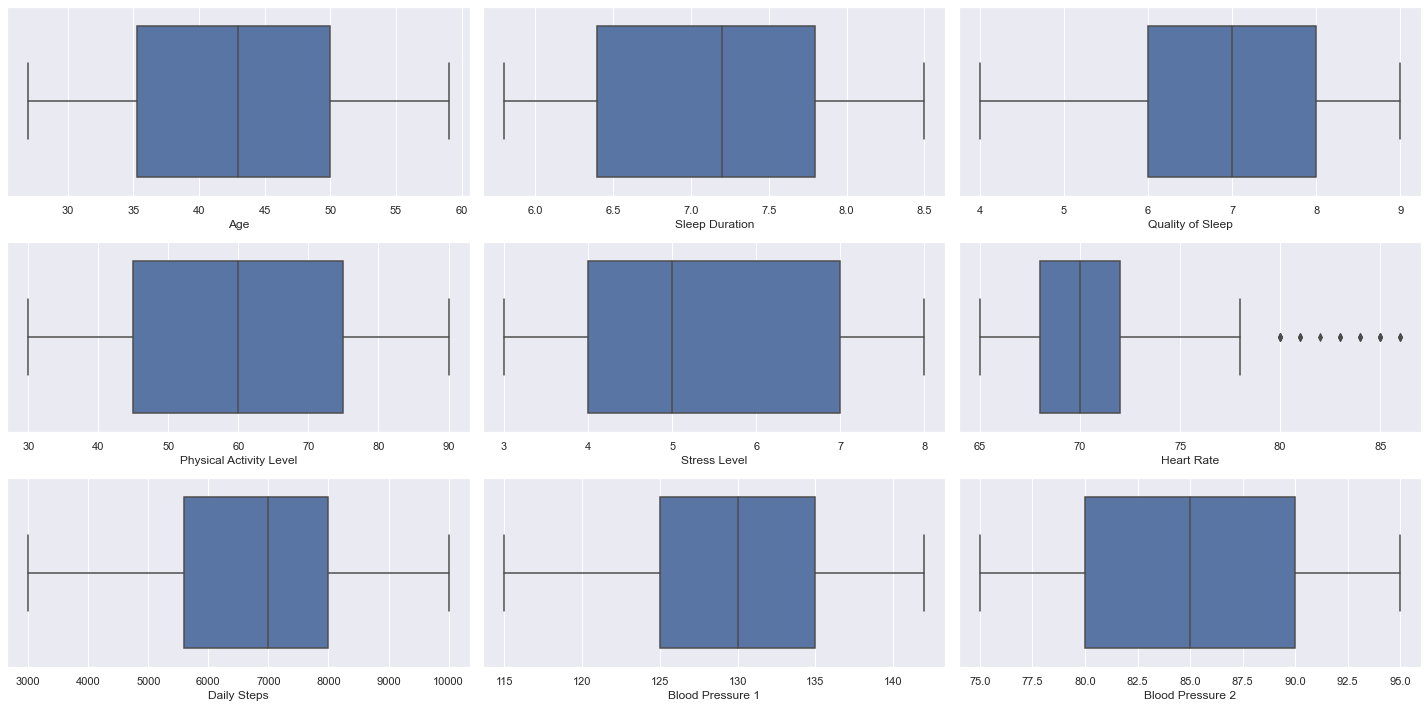

In [16]:
num_vars = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", 
           "Daily Steps", "Blood Pressure 1", "Blood Pressure 2"]

#Create figure with subplots
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))
axs = axs.flatten()

#
for i, var in enumerate(num_vars):
    sns.boxplot(x = var,data=df, ax=axs[i])
    
    
fig.tight_layout()

plt.show()

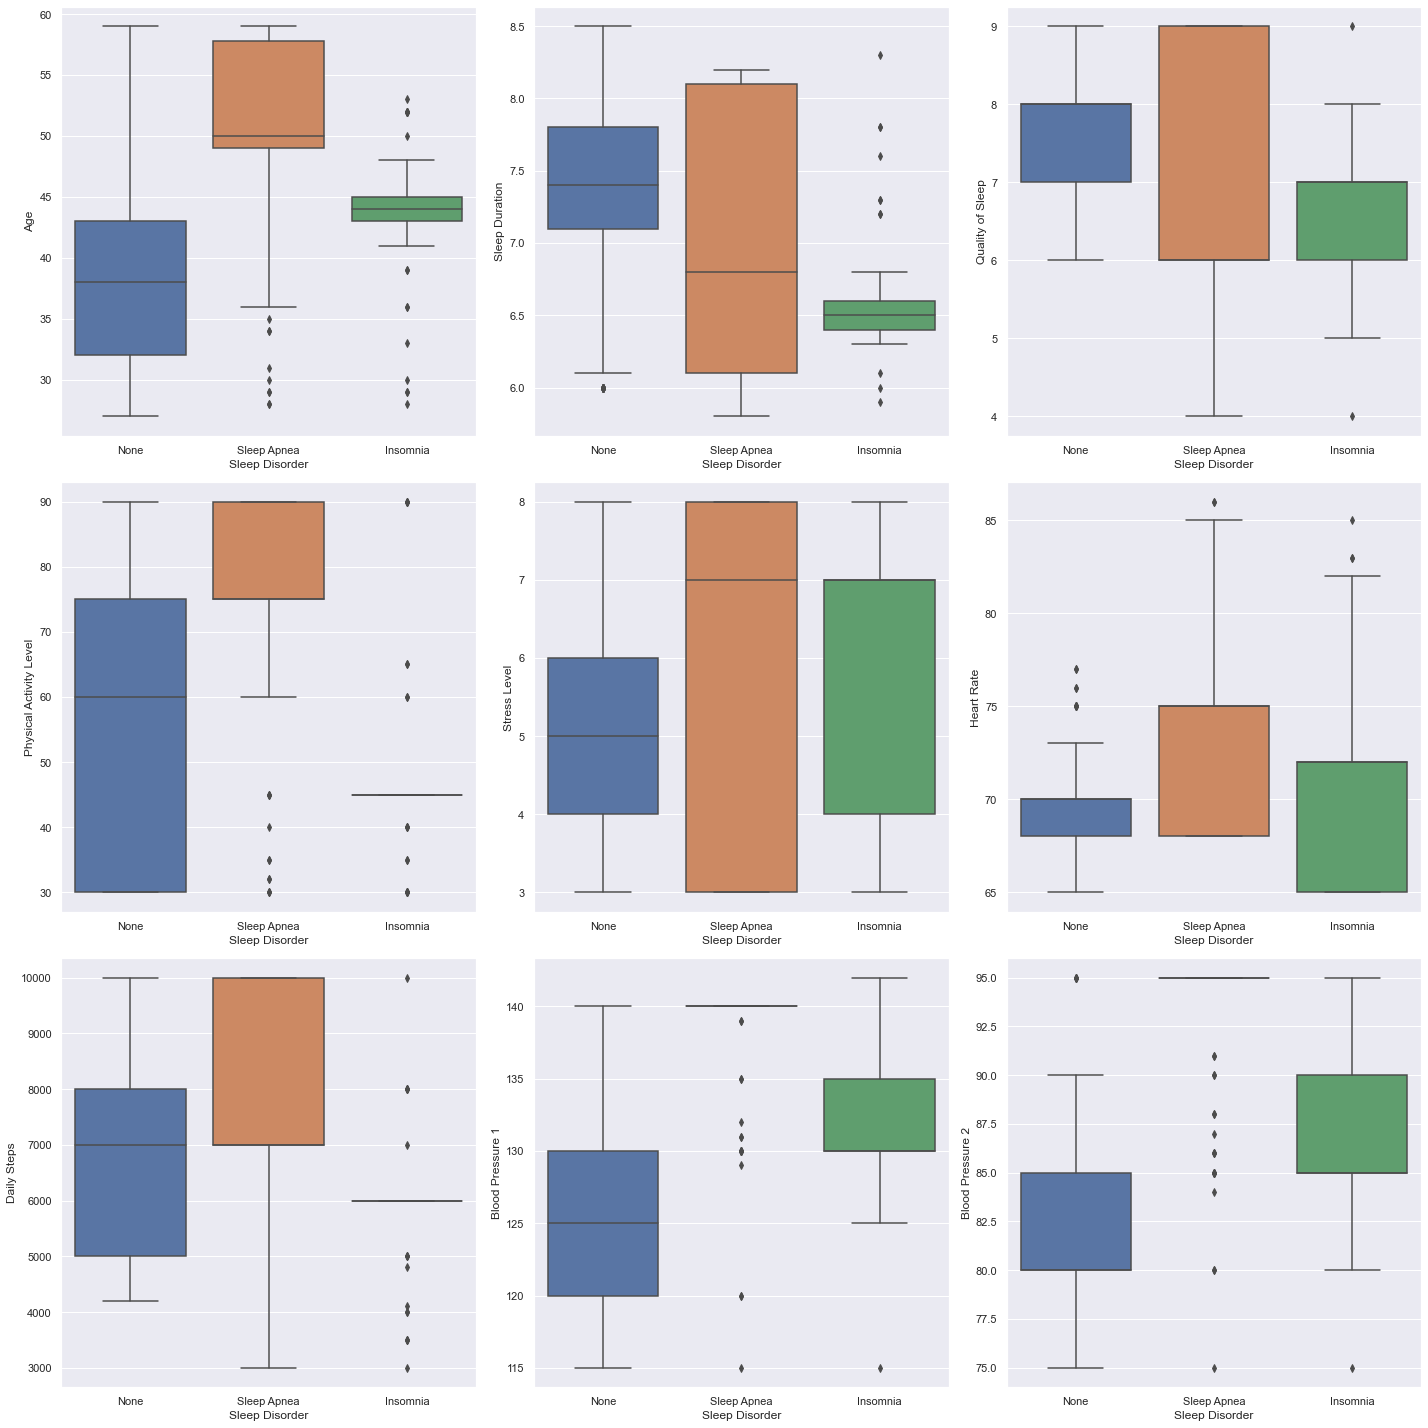

In [17]:
num_vars = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", 
           "Daily Steps", "Blood Pressure 1", "Blood Pressure 2"]

#Create figure with subplots
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20))
axs = axs.flatten()

#
for i, var in enumerate(num_vars):
    sns.boxplot(y = var,x = "Sleep Disorder", data=df, ax=axs[i])
    
    
fig.tight_layout()

plt.show()

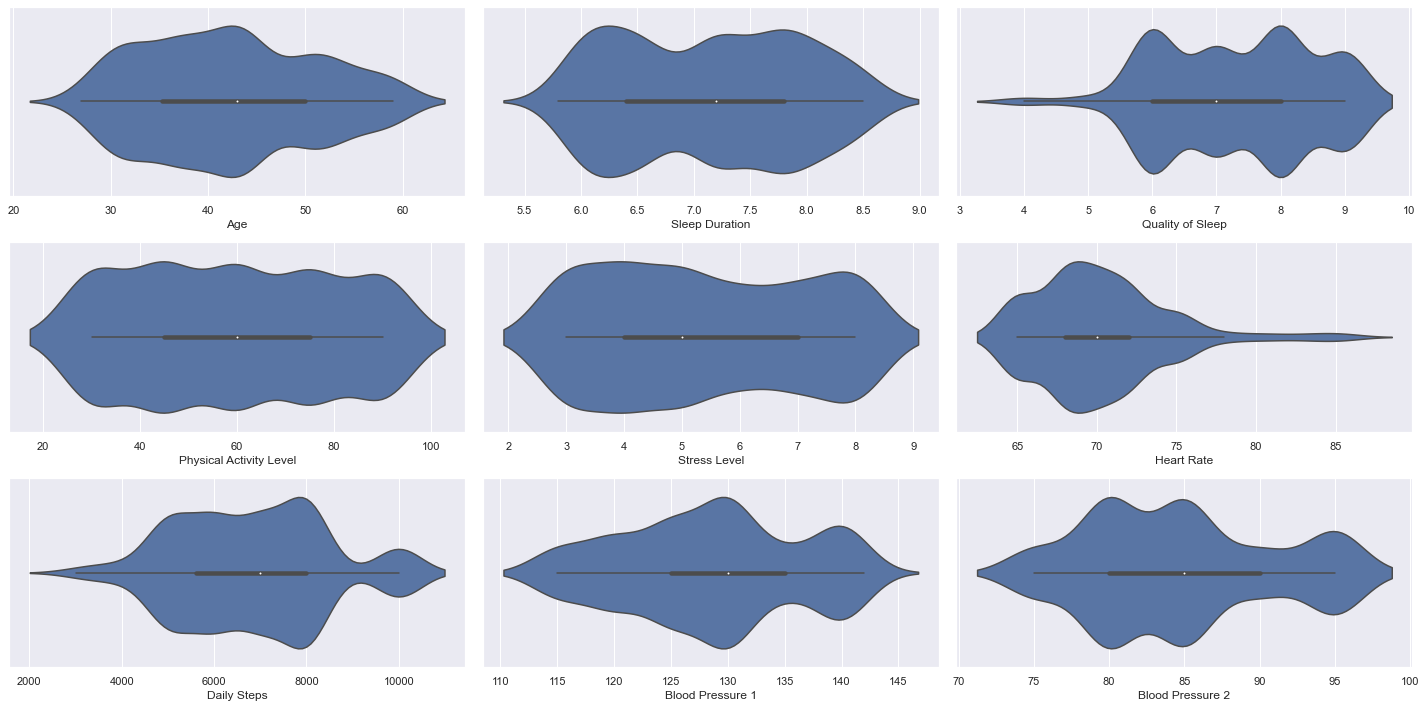

In [18]:
num_vars = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", 
           "Daily Steps", "Blood Pressure 1", "Blood Pressure 2"]

#Create figure with subplots
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))
axs = axs.flatten()

#
for i, var in enumerate(num_vars):
    sns.violinplot(x = var,data=df, ax=axs[i])
    
    
fig.tight_layout()

plt.show()

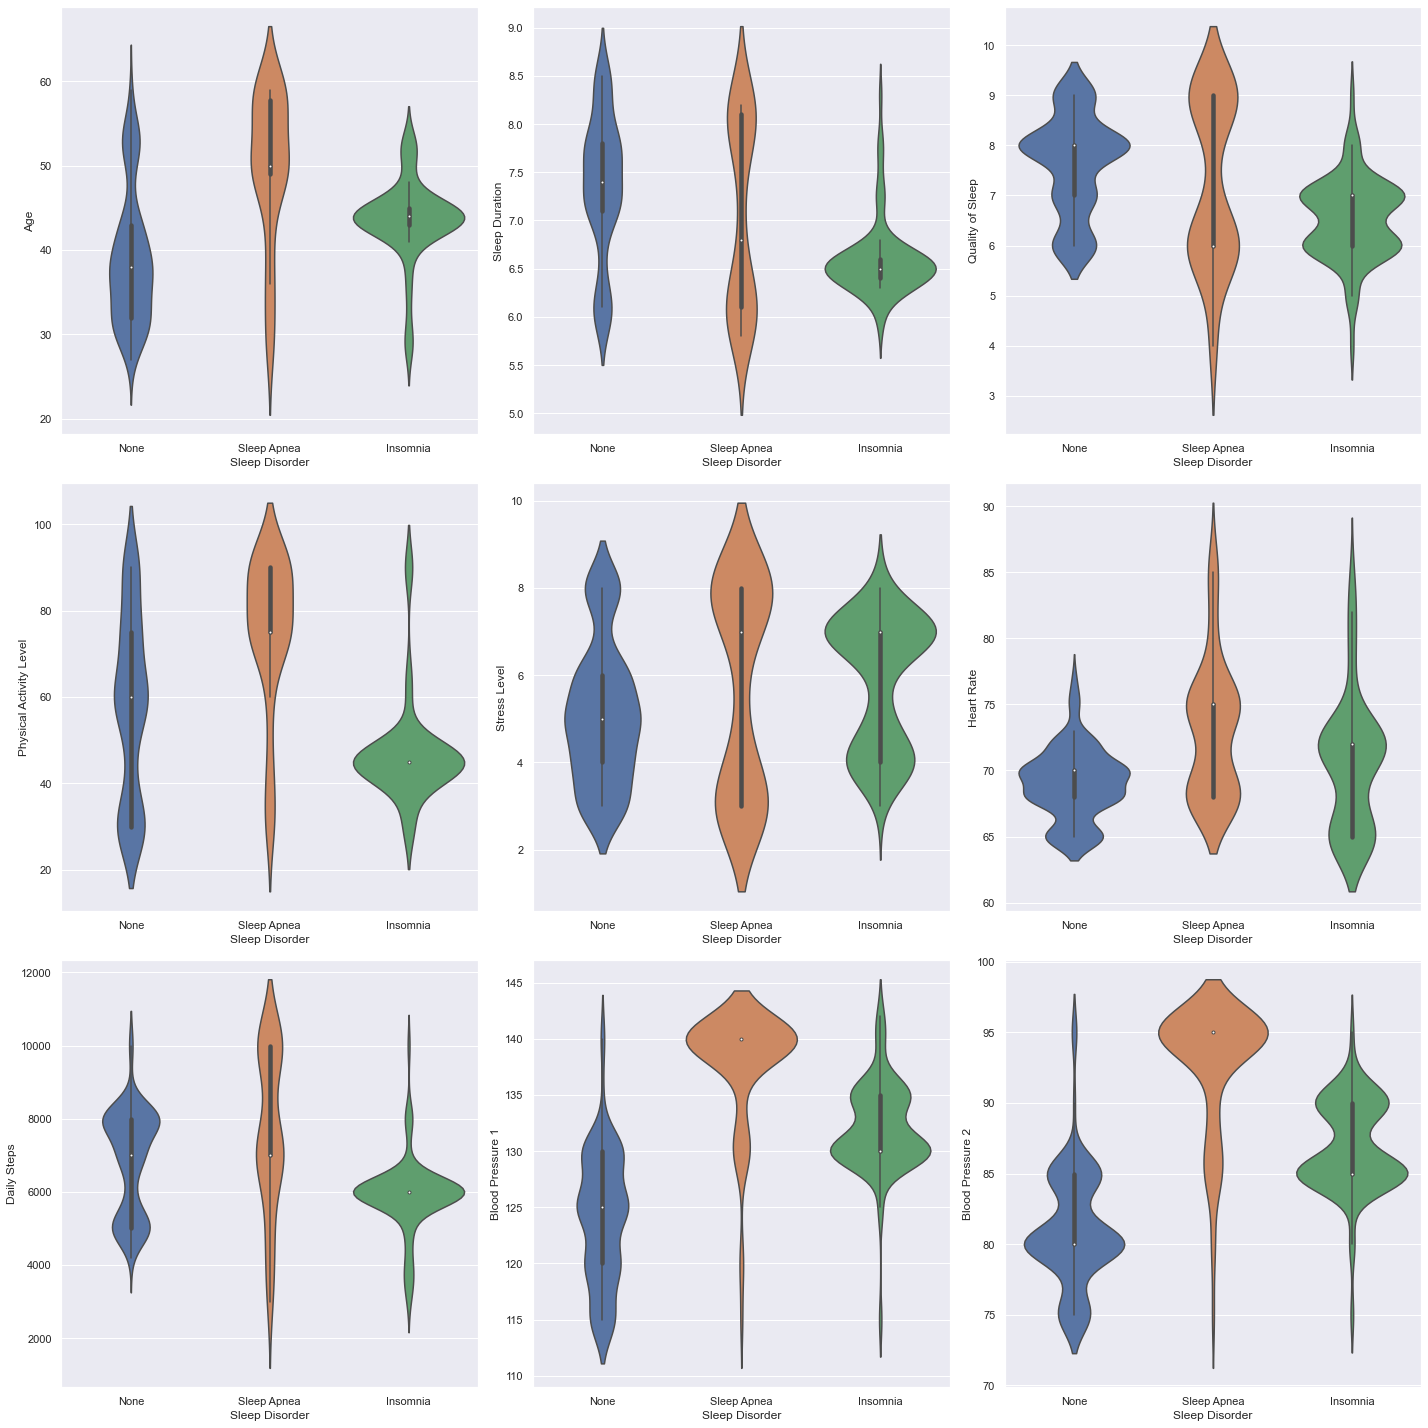

In [19]:
num_vars = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", 
           "Daily Steps", "Blood Pressure 1", "Blood Pressure 2"]

#Create figure with subplots
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20))
axs = axs.flatten()

#
for i, var in enumerate(num_vars):
    sns.violinplot(y = var,x = "Sleep Disorder", data=df, ax=axs[i])
    
    
fig.tight_layout()

plt.show()

#### Level encodig of categorical variable

In [20]:
for col in df.select_dtypes(include=["object"]).columns:
    
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Sleep Disorder: ['None' 'Sleep Apnea' 'Insomnia']


In [21]:
from sklearn import preprocessing

for col in df.select_dtypes(include=["object"]).columns:
    
    lebel_encoder = preprocessing.LabelEncoder()
    
    lebel_encoder.fit(df[col].unique())
    
    df[col] = lebel_encoder.transform(df[col])
    
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
Occupation: [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category: [3 0 2 1]
Sleep Disorder: [1 2 0]


### Corelation heatmap

<AxesSubplot:>

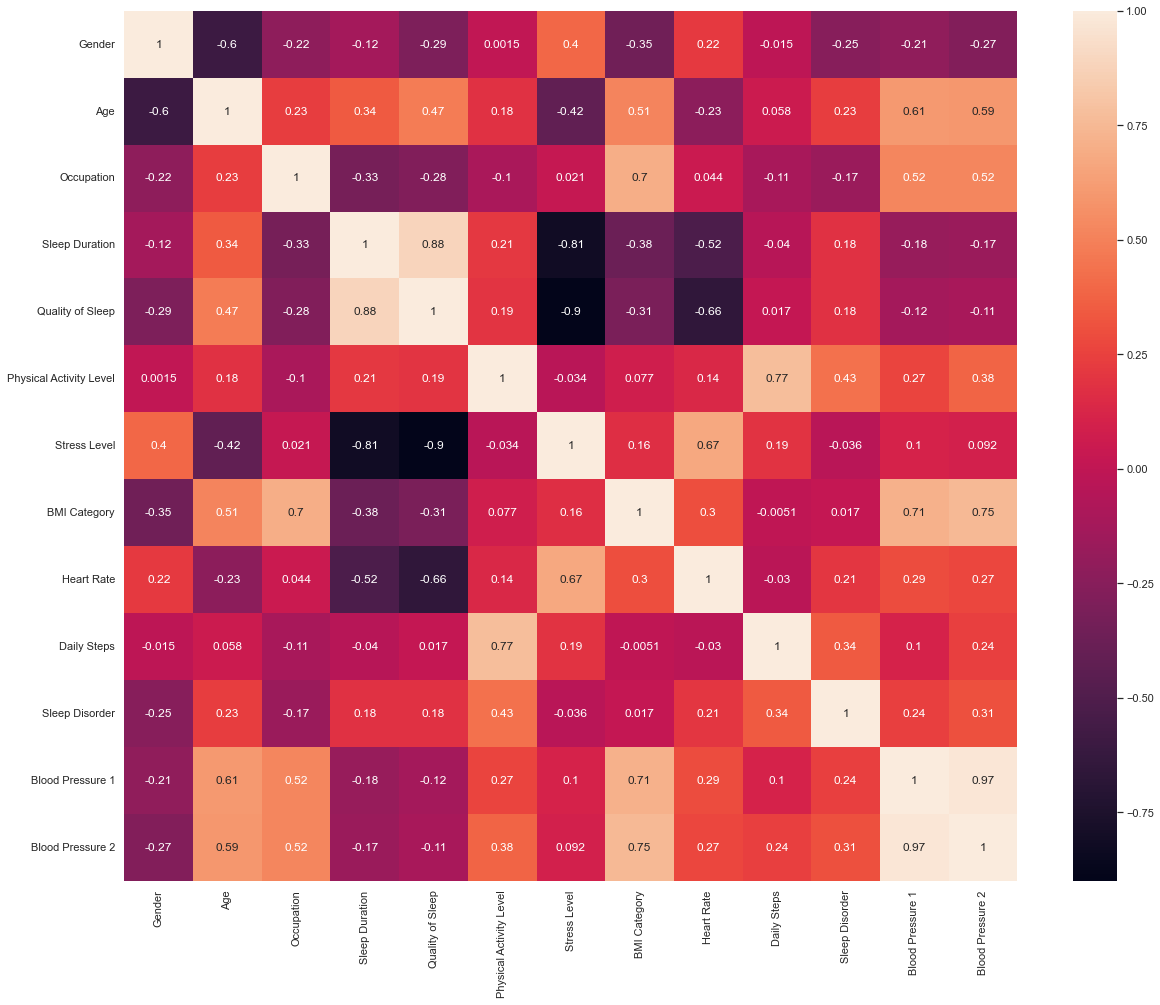

In [22]:
plt.figure(figsize = (20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

## Feature enginnering and model building

#### Train Test split

In [23]:
from sklearn.model_selection import train_test_split
#select the frature (x) and target variable (Y)
X = df.drop('Sleep Disorder', axis = 1)
y = df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [24]:
X_train.shape, y_train.shape

((299, 12), (299,))

#### Remove the outlier from train data using standard normal (Z-score)

In [28]:
# import statistical library
from scipy import stats
# selected the column
selected_column = ['Heart Rate']
#Calculate Z score
z_scores = np.abs(stats.zscore(X_train[selected_column]))
# Setting threshold to find outliers
threshold = 3
#finding the outliers
outlier_indices = np.where(z_scores > threshold)[0]
#remove the outliers
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [29]:
X_train.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Blood Pressure 1', 'Blood Pressure 2'],
      dtype='object')

<AxesSubplot:xlabel='Blood Pressure 2', ylabel='Heart Rate'>

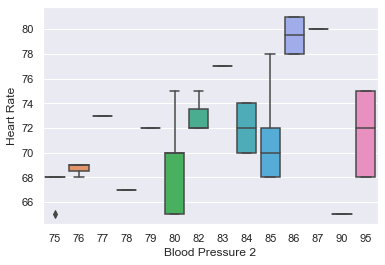

In [31]:
sns.boxplot(x=var, y='Heart Rate', data=X_train)

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth' : [3, 4, 5, 6, 7 ,8],
    'min_samples_split':[2, 3, 4],
    'min_samples_leaf':[1, 2, 3, 4],
    'random_state':[0, 42]
}

#perfrom gridsearch with crossvalidation
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf= 1, min_samples_split= 2, random_state= 0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [37]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100, 2), "%")

Accuracy Score : 90.67 %


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.93      0.98      0.95        41
           2       1.00      0.71      0.83        14

    accuracy                           0.91        75
   macro avg       0.92      0.86      0.88        75
weighted avg       0.91      0.91      0.90        75



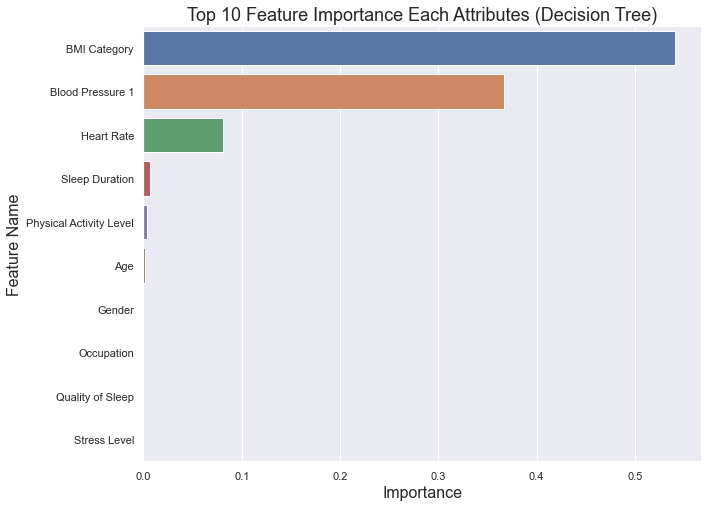

In [42]:
imp_df = pd.DataFrame({
    "Feature Name" : X_train.columns,
    "Importance" : dtree.feature_importances_
})
fi = imp_df.sort_values(by = "Importance", ascending = False)
fi2 = fi.head(10)
plt.figure(figsize = (10,8))
sns.barplot(data = fi2, x='Importance', y='Feature Name')
plt.title("Top 10 Feature Importance Each Attributes (Decision Tree)", fontsize = 18)
plt.xlabel("Importance", fontsize = 16)
plt.ylabel("Feature Name", fontsize = 16)
plt.show()

### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.91')

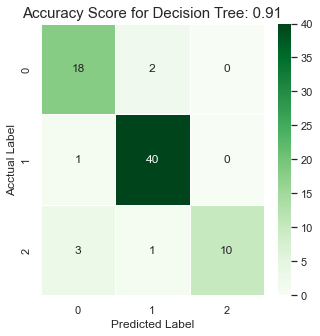

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5, 5))
sns.heatmap(data = cm, linewidths = .5, annot = True, cmap = 'Greens')
plt.ylabel("Acctual Label")
plt.xlabel("Predicted Label")
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(round(dtree.score(X_test, y_test), 2))
plt.title(all_sample_title, size = 15)